<a href="https://colab.research.google.com/github/alvinadar/RESNET/blob/main/Cifar_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [ ]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

STEP #2: VISUALIZE DATA

[1]


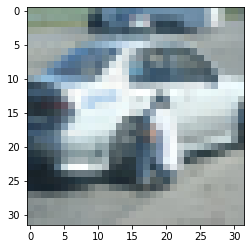

In [ ]:
i = 30009
plt.imshow(X_train[i])
print(y_train[i])

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


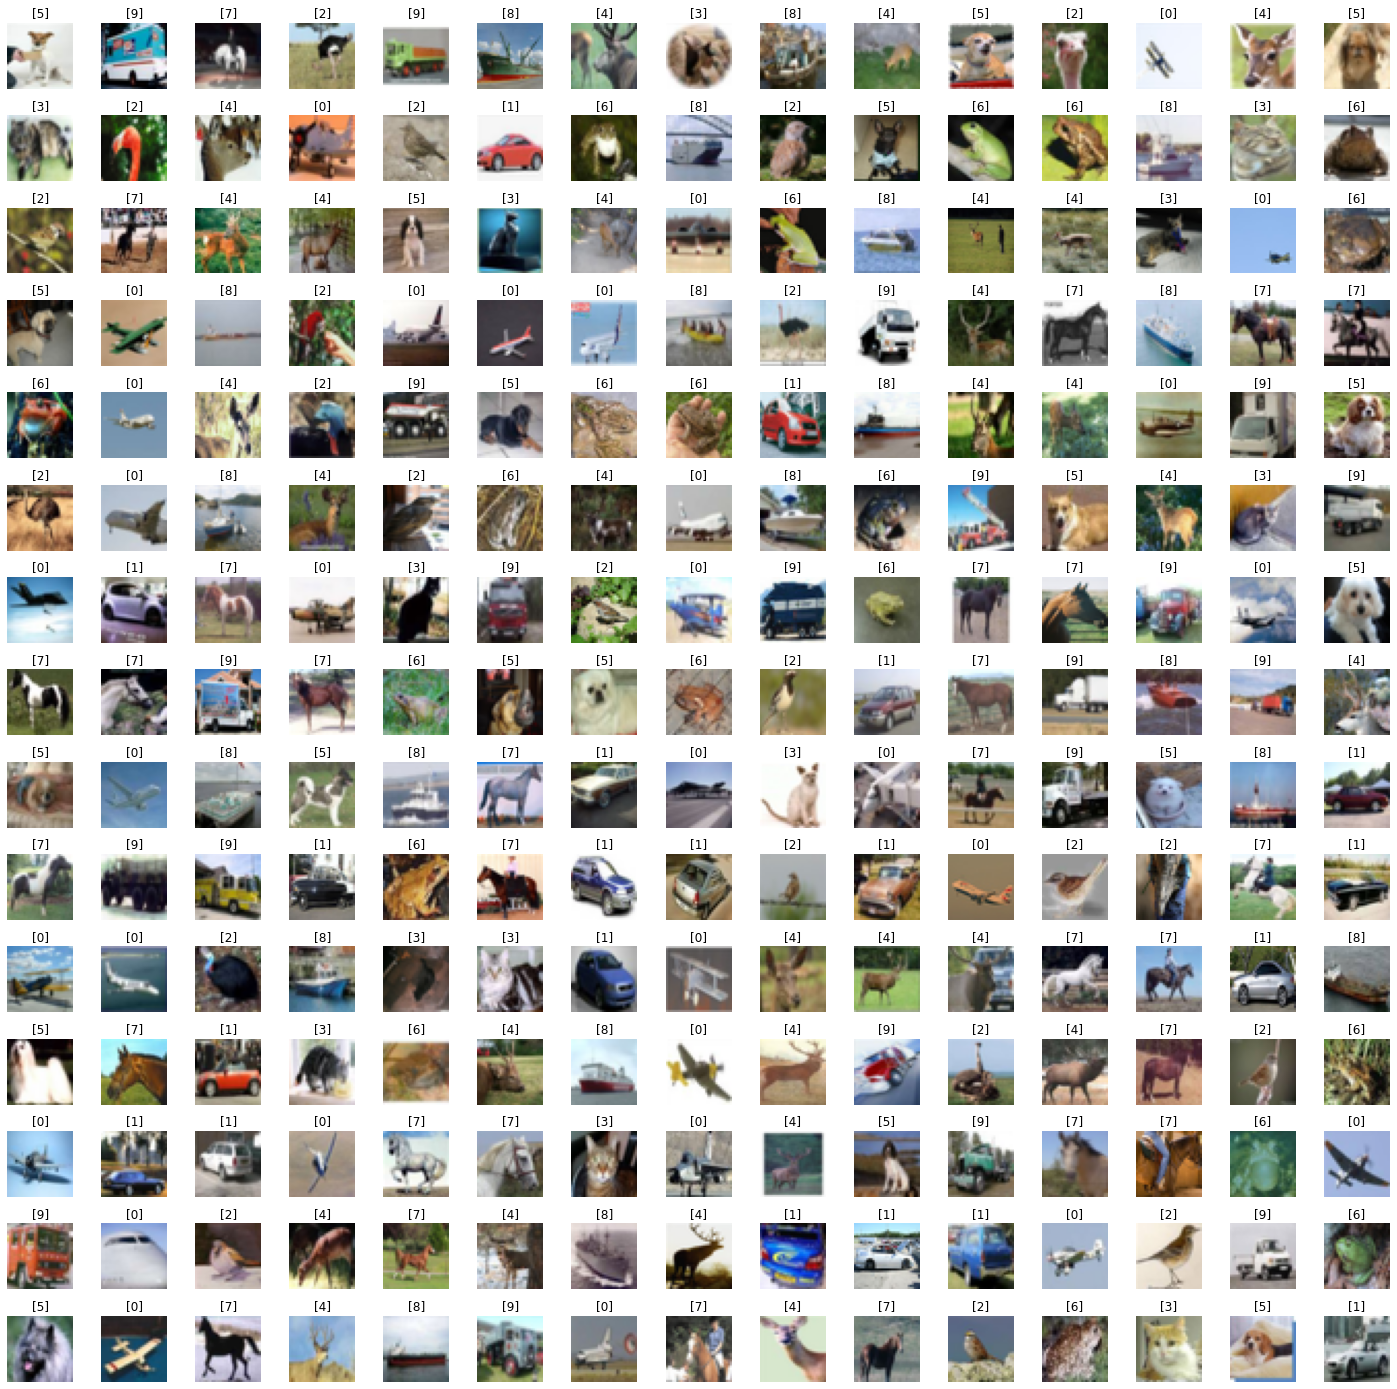

In [ ]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
number_cat = 10

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
import keras
y_test = keras.utils.to_categorical(y_test, number_cat)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [ ]:
X_test 

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [ ]:
X_train.shape 

(50000, 32, 32, 3)

In [ ]:
Input_shape = X_train.shape[1:]

In [ ]:
Input_shape

(32, 32, 3)

**Train the model**

In [ ]:
from keras.models import Sequential
from keras.layers import  Conv2D, MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout 
from keras.optimizers import Adam
from keras.callbacks import  TensorBoard  

LeNet

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation= 'relu',input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))

cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024 ,activation = 'relu'))
cnn_model.add(Dense(units = 1024 ,activation = 'relu'))


cnn_model.add(Dense(units = 10 ,activation = 'softmax'))

In [ ]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])

In [ ]:
history = cnn_model.fit(X_train, y_train, batch_size = 128, epochs = 100, shuffle = True)

Epoch 1/100
391/391 [==============================] - 20s 9ms/step - loss: 2.1464 - accuracy: 0.1863
Epoch 2/100
391/391 [==============================] - 3s 9ms/step - loss: 1.7623 - accuracy: 0.3545
Epoch 3/100
391/391 [==============================] - 3s 9ms/step - loss: 1.6081 - accuracy: 0.4096
Epoch 4/100
391/391 [==============================] - 3s 9ms/step - loss: 1.4960 - accuracy: 0.4590
Epoch 5/100
391/391 [==============================] - 3s 9ms/step - loss: 1.3910 - accuracy: 0.4988
Epoch 6/100
391/391 [==============================] - 3s 9ms/step - loss: 1.3380 - accuracy: 0.5215
Epoch 7/100
391/391 [==============================] - 3s 9ms/step - loss: 1.2862 - accuracy: 0.5436
Epoch 8/100
391/391 [==============================] - 3s 9ms/step - loss: 1.2378 - accuracy: 0.5614
Epoch 9/100
391/391 [==============================] - 3s 9ms/step - loss: 1.2016 - accuracy: 0.5776
Epoch 10/100
391/391 [==============================] - 4s 9ms/step - loss: 1.1789 - accur

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


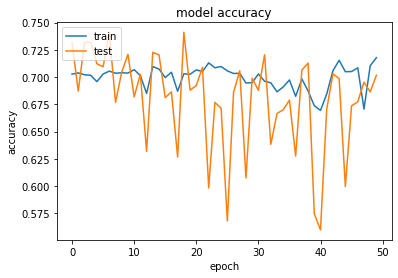

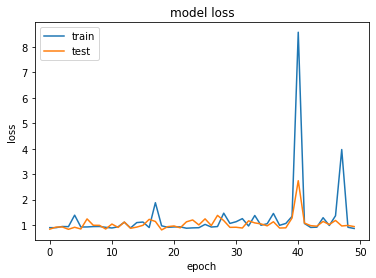

In [ ]:
history = cnn_model.fit(X_train, y_train, validation_split=0.20, epochs=50, batch_size=128, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.9820 - accuracy: 0.6838
Test Accuracy: 0.6837999820709229


In [ ]:
predicted_classes = cnn_model.predict_classes(X_test) 
predicted_classes

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([8, 8, 8, ..., 5, 1, 7])

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
y_test = y_test.argmax(1)

In [ ]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

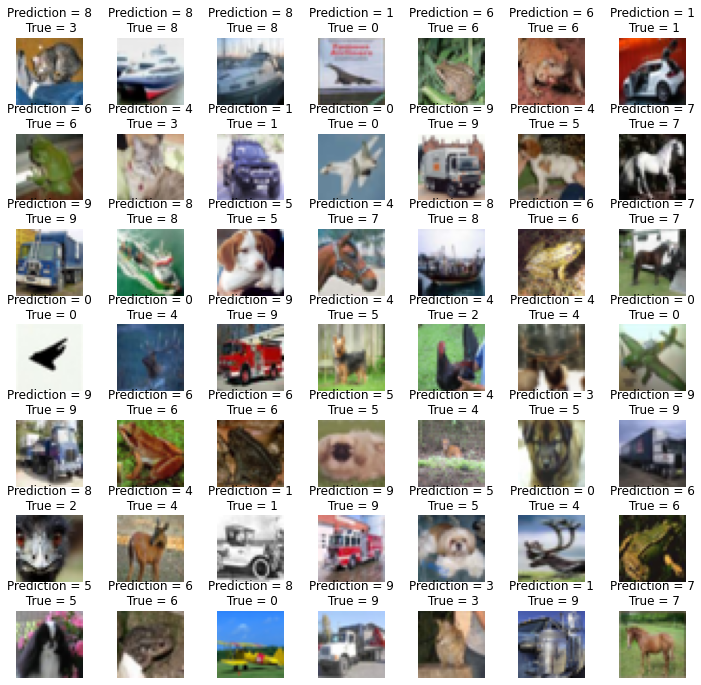

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5)   



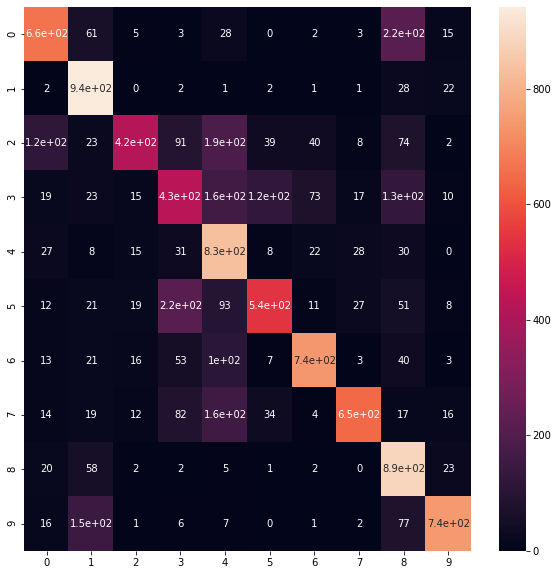

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [ ]:
import numpy
import sklearn.metrics


r = sklearn.metrics.confusion_matrix(y_test, predicted_classes)

r = numpy.flip(r)

acc = (r[0][0] + r[-1][-1]) / numpy.sum(r)
print(acc)

0.1408


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np


cm = confusion_matrix(y_test, predicted_classes)
accuracy = sum(np.diag(cm))/np.sum(cm) #Takes the total sum of the true postive devides with all the true postives and true negatives.  
recall = np.diag(cm) / np.sum(cm, axis = 1)#Takes all the true postives devides with all the true postives and true negatives.
precision = np.diag(cm) / np.sum(cm, axis = 0)#Takes all the true postives devides with all the true postives and true negatives. 

print('The accuracy calculated from the confusion matrix: ',format(accuracy))
print('The recall calculated from the confusion matrix: ',format(recall))
print('The precision calculated from the confusion matrix: ',format(precision))

The accuracy calculated from the confusion matrix:  0.6838
The recall calculated from the confusion matrix:  [0.664 0.941 0.417 0.43  0.831 0.538 0.74  0.646 0.887 0.744]
The precision calculated from the confusion matrix:  [0.73532669 0.71233914 0.83067729 0.4673913  0.52661597 0.71447543
 0.82589286 0.87891156 0.5726275  0.88256228]


In [ ]:
np.sum(cm)


10000

In [ ]:
sum(np.diag(cm))

6838